# Банки — Анализ оттока клиентов

# Материалы:
- [Презентация](https://disk.yandex.ru/i/Shu7Xuo8JttipQ)
- [Дашборд](https://public.tableau.com/views/Bank_16839828601020/Dashboard2?:language=en-US&:display_count=n&:origin=viz_share_link)

### Цель: 
Проанализировать клиентов регионального банка и выделить портрет (аватар) клиентов, которые склонны уходить из банка.

### Описание датасетов

Датасет содержит данные о клиентах банка «Метанпром». Банк располагается в Ярославле и областных городах: Ростов Великий и Рыбинск.

Колонки:

- `userid` — идентификатор пользователя,
- `score` — баллы кредитного скоринга,
- `City` — город,
- `Gender` — пол,
- `Age` — возраст,
- `Objects` — количество объектов в собственности 
/ `equity`  — количество баллов собственности
- `Balance` — баланс на счёте,
- `Products` — количество продуктов, которыми пользуется клиент,
- `CreditCard` — есть ли кредитная карта,
- `Loyalty` / `last_activity` — активный клиент,
- `estimated_salary` — заработная плата клиента,
- `Churn` — ушёл или нет.

### План выполнения проекта (декомпозиция)

* **Шаг 1. Подготовка данных:**
    - Загрузка данных из источника (например, csv-файл).
    - Изучение данных: описание столбцов, типов данных, наличие пропущенных значений и выбросов.
    - Обработка пропущенных значений и выбросов (например, удаление, замена и, возможно, оставление "как есть").
* **Шаг 2. Исследовательский анализ данных (EDA):**
    - Изучение распределения целевой переменной (доли клиентов, которые ушли из банка).
    - Определение распределеения признаков в разрезе оттока. (например, построение гистограмм).
    - Изучение взаимосвязей между признаками (например, корреляционный анализ).
* **Шаг 3. Выделение портретов клиентов:**
    - Понимание профиля клиента, склонного к оттоку.
    - Изучение влияния различных признаков на целевую переменную.
* **Шаг 4. Формулирование и проверка статистических гипотез:**
    - Формулирование нулевой и альтернативной гипотез.
    - Выбор уровня значимости.
    - Проверка гипотезы (например, методом t-теста)
    - Промежуточный вывод: Какой признак был использован для сегментации?

```Т-тест является статистическим методом, который позволяет определить, насколько значимы различия между двумя выборками данных. В данном случае, можно использовать t-тест для сравнения характеристик клиентов, которые остаются в банке и клиентов, которые уходят из банка. Таким образом, можно выявить статистически значимые отличия между этими группами и выделить портрет клиентов, которые склонны уходить из банка.```

* **Шаг 5. Выделение сегментов клиентов**
    - Определение ключевых признаков
    - Идентификация и описание сегментов клиентов на основе ключевых признаков.
    - Определение основных мотиваций и характеристик каждого сегмента клиентов.
* **Шаг 6. Результаты и выводы:**
    - Формулирование выводов и рекомендаций на основе результатов анализа.

 ## Шаг 1. Подготовка данных:

### Загрузка данных из источника

In [1]:
!pip install phik

     |████████████████████████████████| 679 kB 1.1 MB/s eta 0:00:01


In [2]:
# '''
# При редактировании проекта возникла ошибка: "No such keys(s): 'mode.use_inf_as_null'"
# для исправления этой ошибки убеждаюсь, что установлены последняя версия pandas  и 
# последняя версия библиотеки numpy
# '''
# !pip install --upgrade pandas
# !pip install --upgrade numpy

In [3]:
# Импорт библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import statistics as stat
from scipy import stats as st
import os
import phik

# отключение уведомлений об ошибке при замене исходного набора данных
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')
plt.rcParams["figure.figsize"] = (15,7)

In [4]:
# загружаем файлы в переменные
try:
    bank_df = pd.read_csv('bank_dataset.csv')
except:
    bank_df = pd.read_csv('https://code.s3.yandex.net/datasets/bank_dataset.csv')

In [5]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

### Изучение данных

In [6]:
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   userid            10000 non-null  int64  
 1   score             10000 non-null  int64  
 2   City              10000 non-null  object 
 3   Gender            10000 non-null  object 
 4   Age               10000 non-null  int64  
 5   Objects           10000 non-null  int64  
 6   Balance           6383 non-null   float64
 7   Products          10000 non-null  int64  
 8   CreditCard        10000 non-null  int64  
 9   Loyalty           10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  Churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


In [7]:
bank_df.columns = map(str.lower, bank_df.columns)
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   userid            10000 non-null  int64  
 1   score             10000 non-null  int64  
 2   city              10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   objects           10000 non-null  int64  
 6   balance           6383 non-null   float64
 7   products          10000 non-null  int64  
 8   creditcard        10000 non-null  int64  
 9   loyalty           10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


Проверим на дубликаты:

In [8]:
if bank_df.duplicated().sum() == 0:
    print('Дубликаты не обнаружены')
else:
    print(f'Обнаружено дубликатов:{bank_df.duplicated().sum()}')

Дубликаты не обнаружены


In [9]:
if bank_df.drop('userid', axis=1).duplicated().sum() == 0:
    print('Дубликаты не обнаружены')
else:
    print(f'Обнаружено дубликатов:{bank_df.drop("userid", axis=1).duplicated().sum()}')

Дубликаты не обнаружены


Количетсво пропусков большое - 3617. Никакой общей картины для записей с NaN в балансе не проглядывается, при этом, в датасете отсутсвуют записи о нулевом балансе. Посмотрим на пропуски в разрезе признаков:

In [10]:
bank_na = bank_df.copy()
bank_na['nan'] = np.where(bank_df.balance.isna(), 1, 0)
for column in bank_na.columns.drop({'userid', 'balance', 'score', 'age', 'estimated_salary', 'nan'}):
    print(bank_na.groupby([column, 'nan']).agg({'userid':'count'}))
    print('===============================')

                    userid
city           nan        
Ростов Великий 0      2509
Рыбинск        0      1278
               1      1199
Ярославль      0      2596
               1      2418
            userid
gender nan        
Ж      0      2889
       1      1654
М      0      3494
       1      1963
             userid
objects nan        
0       0       276
        1       137
1       0       686
        1       349
2       0       666
        1       382
3       0       657
        1       352
4       0       620
        1       369
5       0       638
        1       374
6       0       600
        1       367
7       0       642
        1       386
8       0       662
        1       363
9       0       624
        1       360
10      0       312
        1       178
              userid
products nan        
1        0      4179
         1       905
2        0      1990
         1      2600
3        0       168
         1        98
4        0        46
         1        14
       

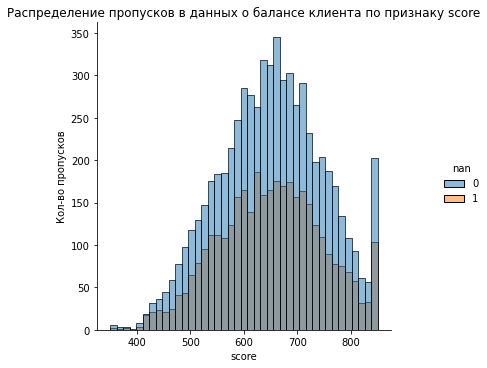

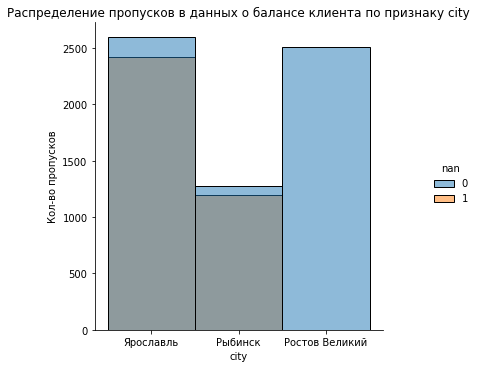

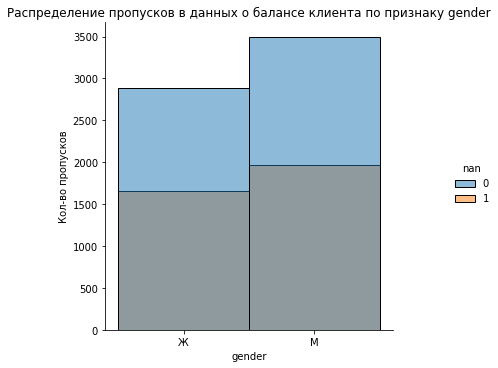

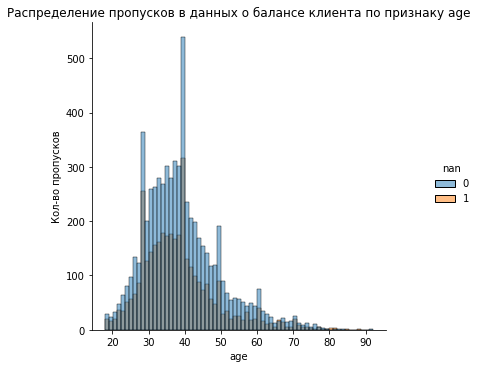

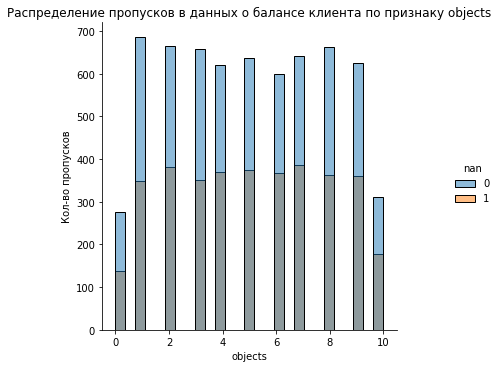

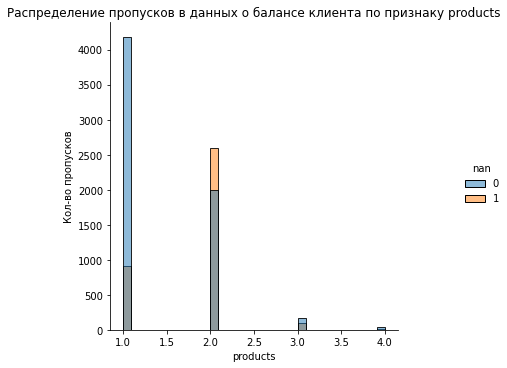

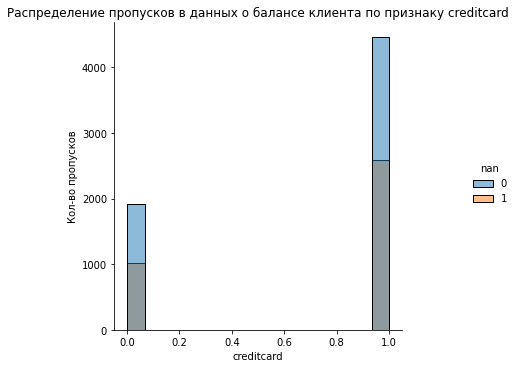

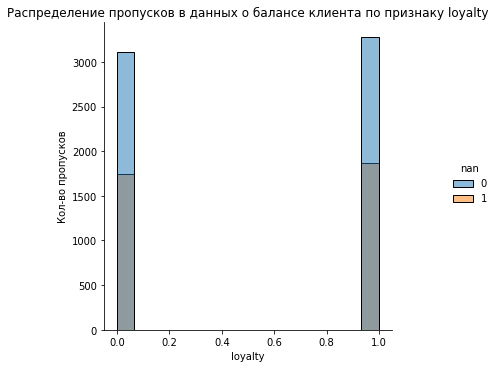

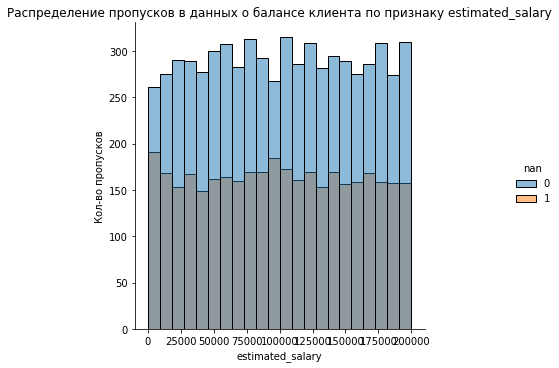

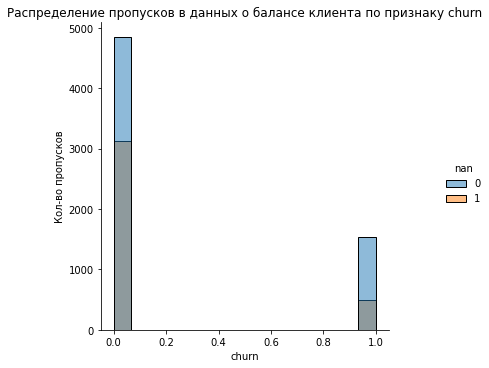

In [11]:
for column in bank_na.columns.drop({'userid', 'balance', 'nan'}):
    sns.displot(bank_na, x=column, hue='nan')
    plt.title(f'Распределение пропусков в данных о балансе клиента по признаку {column}')
    plt.ylabel('Кол-во пропусков')
    plt.show()

Пропуски только у клиентов из Рыбинска и Ярославля. Распределение пропусков по гендеру, кол-ву объектов недвижимости, активности - не подозрительное. Больше пропусков в 2,5 раза у держателей кредиток - возможно, клиенты не пользуются депозитными продуктами и пропуск говорит о нулевом балансе? Также пропуски у 500 клиентов из оттока. Больше всего пропусков у тех, кто использует 2 продукта - 2600. Проверим, соответсвуют ли они держателям кредиток - их схожее кол-во.

In [12]:
bank_na.query('nan == 1 & creditcard == 1 & products == 2')

,userid,score,city,gender,age,objects,balance,products,creditcard,loyalty,estimated_salary,churn,nan
6,15635267,822,Ярославль,М,50,7,NaN,2,1,1,10062.80,0,1
11,15779909,497,Рыбинск,М,24,3,NaN,2,1,0,76390.01,0,1
12,15675000,476,Ярославль,Ж,34,10,NaN,2,1,0,26260.98,0,1
14,15643618,635,Рыбинск,Ж,35,7,NaN,2,1,1,65951.65,0,1
17,15830954,549,Рыбинск,Ж,24,9,NaN,2,1,1,14406.41,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9973,15849191,611,Ярославль,М,27,7,NaN,2,1,1,157474.10,0,1
9977,15622705,683,Ярославль,Ж,32,9,NaN,2,1,1,24991.92,0,1
9988,15632065,775,Ярославль,М,30,4,NaN,2,1,0,49337.84,0,1
9989,15648358,841,Рыбинск,М,28,4,NaN,2,1,1,179436.60,0,1


Половина пропусков принадлежит клиентам с двумя продуктами, один из которых - кредитка.

Явной взаимосвязи между пропусками и дургими признаками клиентов выявить не удалось, заполнить все нулями было бы не совсем правильно, т.к. это довольно большой кусок датасета и эта замена исказит распределение известных нам данных, можно было бы заменить все медианами, но это тоже не самая лучшая идея, т.к. нам достоверно неизвестно, чем вызваны пропуски в данных, и есть ли на самом деле у всех этих клиентов деньги на счетах. Так как информация о балансе счета не участвует в проверке гипотез, попробуем оставить пропуски, чтобы не рисковать искажением результатов дальнейшего анализа данных.

In [13]:
bank_df.drop('userid', axis=1).describe()

,score,age,objects,balance,products,creditcard,loyalty,estimated_salary,churn
count,10000.000000,10000.000000,10000.000000,6383.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,119827.493793,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,30095.056462,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,3768.690000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,100181.975000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,119839.690000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,139512.290000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


Остальные данные выглядят нормально. Привлекает внимание минимальная estimated_salary - нереалистичное значение.

Попробуем разобраться с зарплатой. Откуда такое странное минимальное значение? Сколько еще в датасете таких странных зарплат? МРОТ в Ярославской области составляет 13890р.`<https://www.kommersant.ru/doc/5098147>`, посмотрим, сколько клиентов получют ниже этой суммы.

In [14]:
bank_df.query('estimated_salary < 13890').sort_values(by='estimated_salary')

,userid,score,city,gender,age,objects,balance,products,creditcard,loyalty,estimated_salary,churn
2362,15833789,709,Ростов Великий,М,45,4,122917.71,1,1,1,11.58,1
9647,15722429,625,Ярославль,М,31,5,NaN,2,0,1,90.07,0
9010,15829199,645,Ростов Великий,Ж,59,8,121669.93,2,0,0,91.75,1
5548,15682398,710,Ярославль,М,38,2,NaN,2,1,0,96.27,0
4989,15645587,629,Ярославль,М,40,9,NaN,1,1,0,106.67,0
...,...,...,...,...,...,...,...,...,...,...,...,...
4068,15747646,631,Рыбинск,М,23,3,NaN,2,1,0,13813.24,0
3691,15802980,590,Ярославль,Ж,76,5,160979.68,1,0,1,13848.58,0
3749,15718096,427,Ярославль,М,33,8,NaN,1,1,1,13858.95,0
8337,15611255,534,Ярославль,М,41,9,NaN,2,1,0,13871.34,0


694 клиента с доходом ниже МРОТ, это не много. Стоит учесть, что данные о доходе могут быть недостоверные, плюс в доход может считаться не только зарплата, но и соцвыплаты (пенсия/стипендия) или проценты по вкладам. Оставим эти данные как есть.

Построим матрицу корреляций phic с балансом и категориальными переменными.

In [15]:
cols_to_keep = ["balance", "city", "gender", "churn", "products", "loyalty", "creditcard"]     
df_phic = bank_df[cols_to_keep]
interval_cols = ["balance", "estimated_salary"]
phik_overview = df_phic.phik_matrix(interval_cols=interval_cols)
phik_overview.round(2).head(1)

,balance,city,gender,churn,products,loyalty,creditcard
balance,1.0,0.13,0.0,0.11,0.04,0.02,0.05


### Вывод:

Данные проверены на предмет наличия пропусков (оставили без изменений) и дубликатов (не обнаружено). Наименования столбцов приведены к стандарту snake_case, типы данных указаны верно. Данные готовы к дальнейшему анализу.

## Шаг 2. Исследовательский анализ данных (EDA):

Посмотрим на медиау признаков по статусу оттока:

In [16]:
# вычисление медианы для дискретных переменных
median_score = bank_df['score'].median()
median_age = bank_df['age'].median()
median_objects = bank_df['objects'].median()
median_products = bank_df['products'].median()

# вычисление моды для категориальных переменных
mode_city = bank_df['city'].mode()[0]
mode_gender = bank_df['gender'].mode()[0]
mode_creditcard = bank_df['creditcard'].mode()[0]
mode_loyalty = bank_df['loyalty'].mode()[0]
mode_churn = bank_df['churn'].mode()[0]

# вычисление среднего значения для непрерывных переменных
mean_balance = bank_df['balance'].mean()
mean_salary = bank_df['estimated_salary'].mean()

# выводим результаты на экран
print('Медиана балла кредитного скоринга:', median_score)
print('Медианное значение возраста клиента:', median_age)
print('Медианное значение количества объектов в собственности:', median_objects)
print('Медианное значение количества продуктов, которыми пользуется клиент:', median_products, '\n')

print('Наиболее часто встречающееся в сторлбце "city" значение:', mode_city)
print('Наиболее часто встречающееся в сторлбце "gender" значение:', mode_gender)
print('Наиболее часто встречающееся в сторлбце "creditcard" значение:',mode_creditcard)
print('Наиболее часто встречающееся в сторлбце "loyalty" значение:', mode_loyalty)
print('Наиболее часто встречающееся в сторлбце "churn" значение:', mode_churn, '\n')


print('Среднее значение баланса на счете:', mean_balance)
print('Среднее значение заработной платы клиента:', mean_salary)

Медиана балла кредитного скоринга: 652.0
Медианное значение возраста клиента: 37.0
Медианное значение количества объектов в собственности: 5.0
Медианное значение количества продуктов, которыми пользуется клиент: 1.0 

Наиболее часто встречающееся в сторлбце "city" значение: Ярославль
Наиболее часто встречающееся в сторлбце "gender" значение: М
Наиболее часто встречающееся в сторлбце "creditcard" значение: 1
Наиболее часто встречающееся в сторлбце "loyalty" значение: 1
Наиболее часто встречающееся в сторлбце "churn" значение: 0 

Среднее значение баланса на счете: 119827.49379288737
Среднее значение заработной платы клиента: 100090.239881


**Вывод:**

1. Средняя оценка кредитного скоринга выше, чем медианное значение. Это может свидетельствовать о том, что есть группа клиентов с низким кредитным скорингом, которые сильно смещают среднее значение.

2. Средний возраст клиентов около 37 лет, что может указывать на то, что банк работает как с молодыми, так и со старшими клиентами.

3. Медианное значение количества объектов в собственности равно 5, что может указывать на то, что у большинства клиентов достаточно большой капитал.

4. Большинство клиентов используют только один продукт банка. Это может свидетельствовать о том, что банк может упростить свою линейку продуктов или предложить более выгодные условия для пользования несколькими продуктами.

5. Ярославль - самый популярный город среди клиентов, за ним следуют Ростов Великий и Рыбинск.

6. Большинство клиентов - мужчины.

7. Большинство клиентов имеют кредитную карту и являются активными клиентами.

8. Большинство клиентов не планируют закрывать свои счета в ближайшее время, однако доля клиентов, которые собираются так сделать, достаточно высока и может быть негативным сигналом для банка, что говорит об необходимости принимать меры по удержанию клиентов.

9. Средний баланс на счете и заработная плата клиента выше медианного значения. Это может свидетельствовать о том, что есть группа клиентов с большими деньгами, которые сильно смещают среднее значение.

Посмотрим на графики распределения. Вначале для категориальных величин.

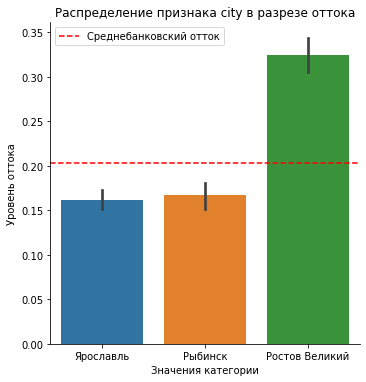

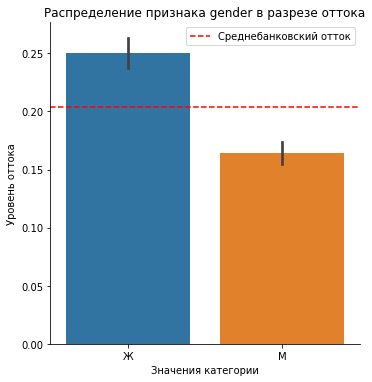

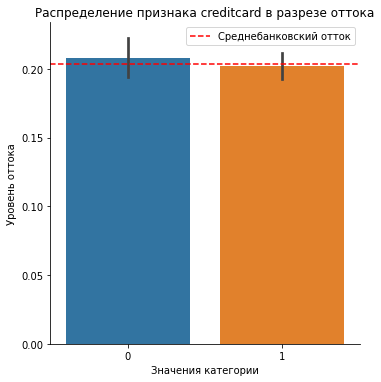

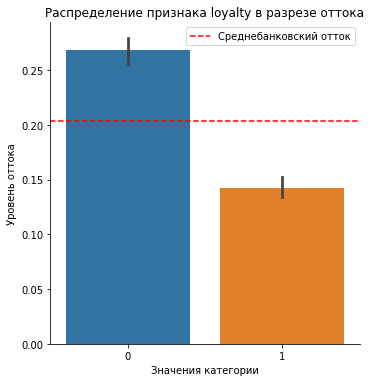

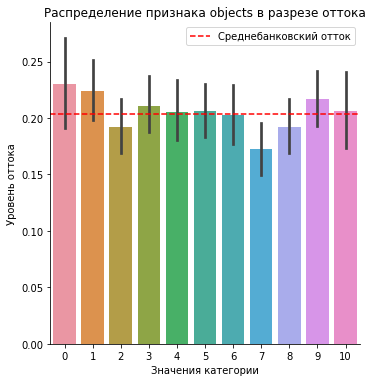

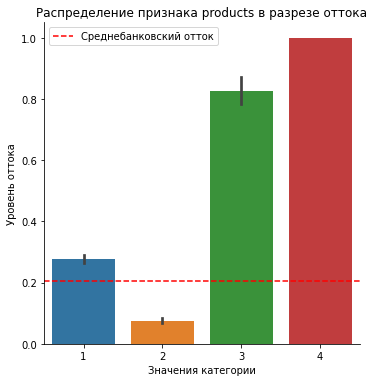

In [17]:
categorical_cols = ['city', 'gender', 'creditcard', 'loyalty', 'objects', 'products']

for col in categorical_cols:
    sns.catplot(x=col, y="churn", kind="bar", data=bank_df)
    plt.axhline(bank_df['churn'].mean(),  linestyle='--', color='r', label='Среднебанковский отток')
    plt.title('Распределение признака {} в разрезе оттока'.format(col))
    plt.xlabel('Значения категории')
    plt.ylabel('Уровень оттока')
    plt.legend()
    plt.show()

на графиках видим:

- в Рыбинске и Ростове Великом примерно поровну клиентов, в Ярославле гораздо больше, все логично;
- мужчин немного больше чем женщин;
- Владельцев КК значительно больше чем клиентов не пользующихся картой;
- клиентов совершают какиe-либо действия в приложении и не делающих этого практически поровну;
- среднебанковский отток у клиентов с 0, 1 и 9 объектами в собственности
- в отток попадают чаще всего клиенты пользующиеся 3-4 продуктами банка

Теперь построим распределения для количественных данных

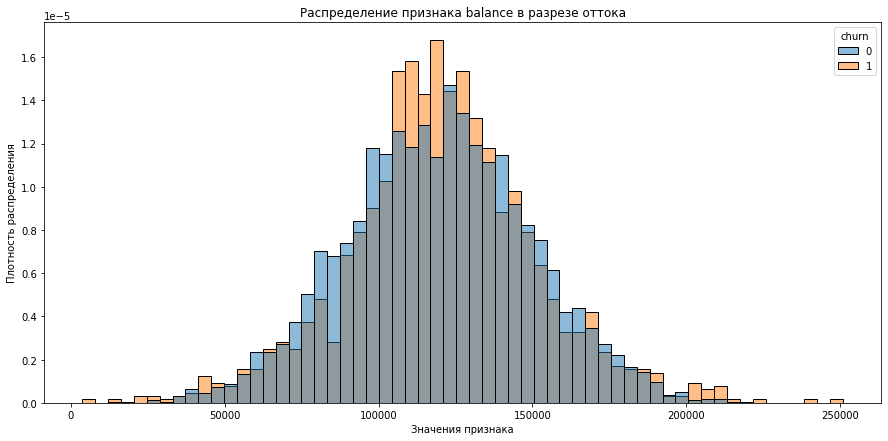

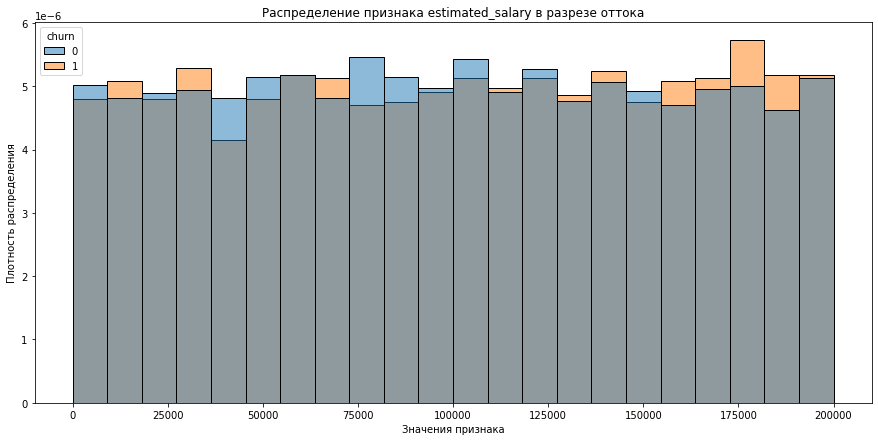

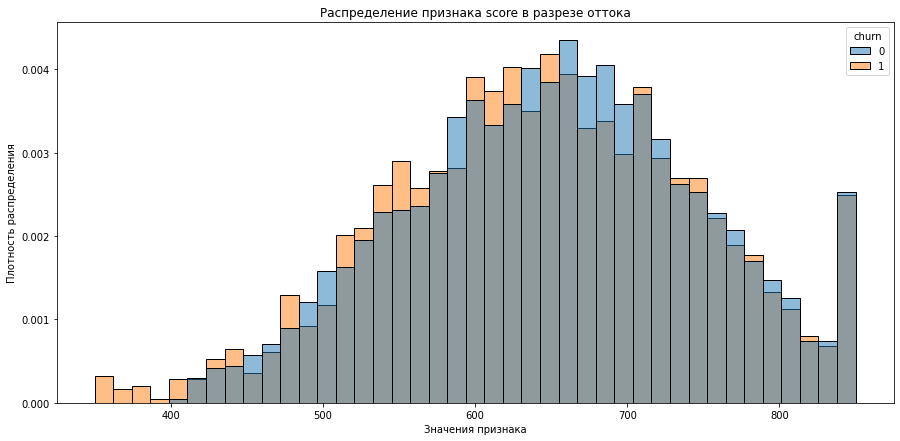

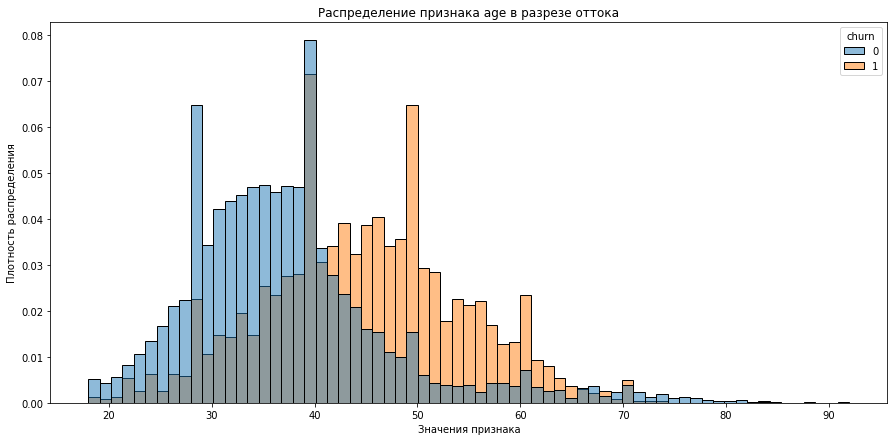

In [18]:
# непрерывные данные
continuous_cols = ['balance', 'estimated_salary', 'score', 'age']
for col in continuous_cols:
    plt.figure()
    sns.histplot(data=bank_df, x=col, hue='churn', stat="density", common_norm=False)
    plt.title('Распределение признака {} в разрезе оттока'.format(col))
    plt.xlabel('Значения признака')
    plt.ylabel('Плотность распределения')
    plt.show()

- распределение кредитного рейтинга возраста и баланса походит на нормальное, хотя имеются выбросы (например, максимальное значение рейтинга, добавленные нами нули в балансе несколько пик в графике возраста);
- распределение рассчитанного дохода скорее всего равномерное;
- график подтверждает, что большинство клиентов имеют высокий кредитный рейтинг;
- распределение возраста показывает, что "отточные" имеют возраст 42+

**Построим матрицу корреляций признаков клиентов:**

Для более правильного отображения корреляции закодируем категориальные признаки city и gender

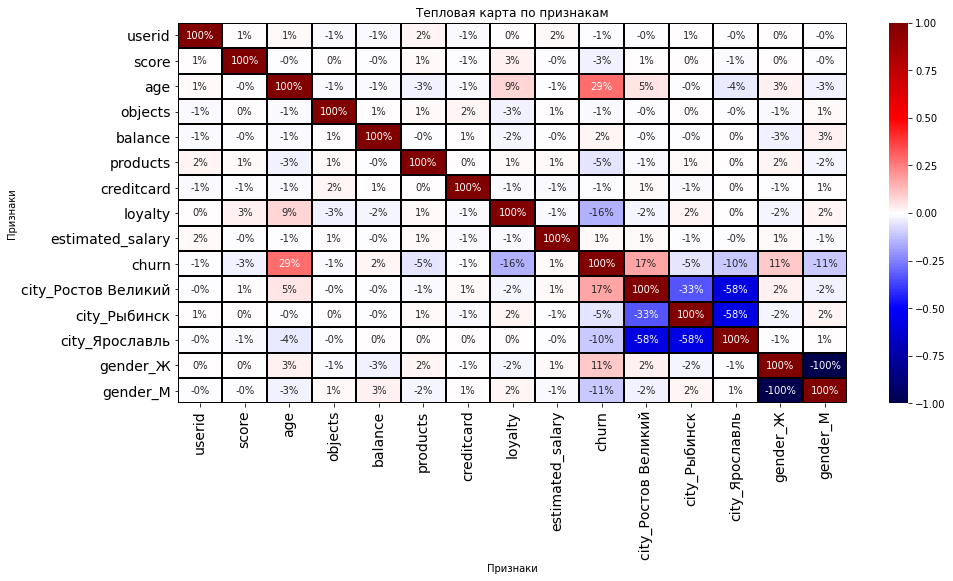

In [19]:
df_corr = pd.get_dummies(bank_df, columns=['city', 'gender'])

sns.heatmap(df_corr.corr(), annot=True, fmt='.0%', vmin=-1, vmax=1, center=0, cmap='seismic', linewidths=1, linecolor='black')
plt.title('Тепловая карта по признакам')
plt.xticks(fontsize=14, rotation=90)
plt.yticks(fontsize=14, rotation=360)
plt.ylabel('Признаки')
plt.xlabel('Признаки')
plt.show()

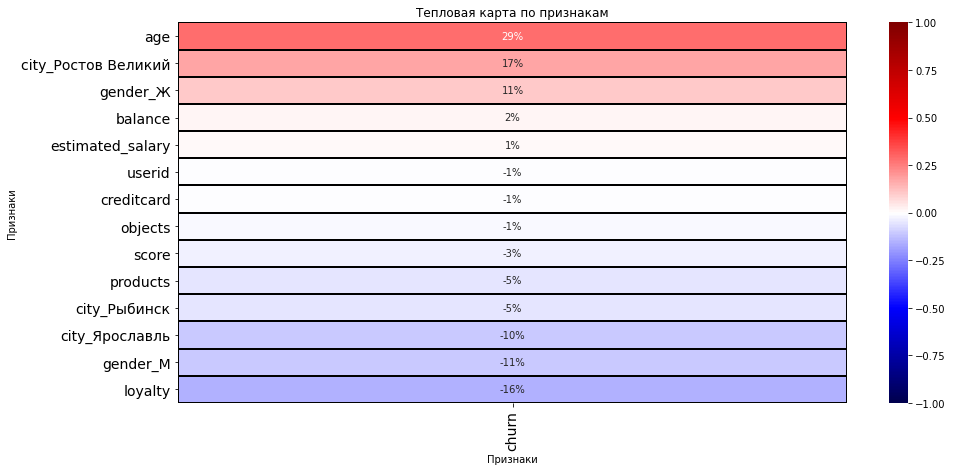

In [20]:
# Выполнить One-Hot Encoding для категориальных признаков
bank_df_2 = pd.get_dummies(bank_df)

# Вычислить корреляцию
df_corr = bank_df_2.corr().drop('churn', axis=0).sort_values('churn', ascending=False)

# Построить тепловую карту
sns.heatmap(df_corr[['churn']], annot=True, fmt='.0%', vmin=-1, vmax=1, center=0, cmap='seismic', linewidths=1, linecolor='black')
plt.title('Тепловая карта по признакам')
plt.xticks(fontsize=14, rotation=90)
plt.yticks(fontsize=14, rotation=360)
plt.ylabel('Признаки')
plt.xlabel('Признаки')
plt.show()

interval columns not set, guessing: ['userid', 'score', 'age', 'objects', 'balance', 'products', 'creditcard', 'loyalty', 'estimated_salary', 'churn']


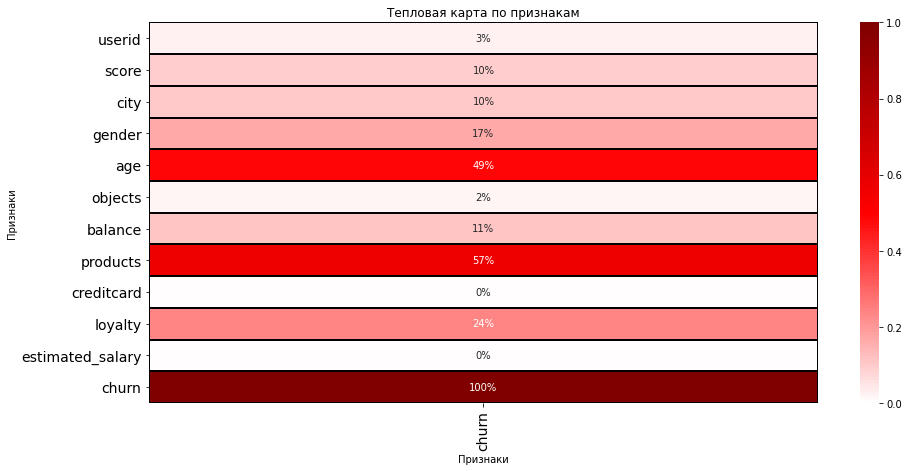

In [21]:
df_phik = bank_df.phik_matrix()

sns.heatmap(df_phik[['churn']], annot=True, fmt='.0%', vmin=0, vmax=1, center=0, cmap='seismic', linewidths=1, linecolor='black')
plt.title('Тепловая карта по признакам')
plt.xticks(fontsize=14, rotation=90)
plt.yticks(fontsize=14, rotation=360)
plt.ylabel('Признаки')
plt.xlabel('Признаки')
plt.show()

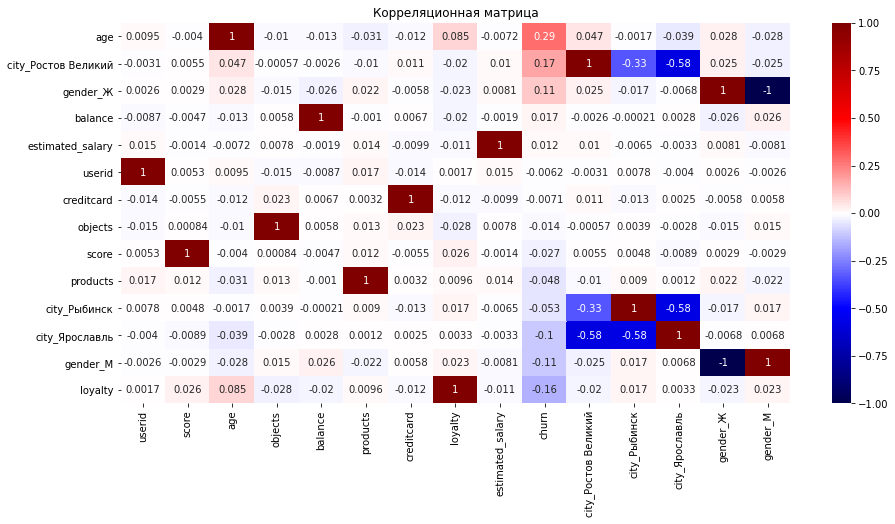

Корреляция между 'churn' и 'age': 0.29 (Умеренная прямая корреляция)
Корреляция между 'churn' и 'city_Ростов Великий': 0.17 (Умеренная прямая корреляция)
Корреляция между 'churn' и 'gender_Ж': 0.11 (Умеренная прямая корреляция)
Корреляция между 'churn' и 'balance': 0.02 (Отсутствие корреляции)
Корреляция между 'churn' и 'estimated_salary': 0.01 (Отсутствие корреляции)
Корреляция между 'churn' и 'userid': -0.01 (Отсутствие корреляции)
Корреляция между 'churn' и 'creditcard': -0.01 (Отсутствие корреляции)
Корреляция между 'churn' и 'objects': -0.01 (Отсутствие корреляции)
Корреляция между 'churn' и 'score': -0.03 (Отсутствие корреляции)
Корреляция между 'churn' и 'products': -0.05 (Отсутствие корреляции)
Корреляция между 'churn' и 'city_Рыбинск': -0.05 (Отсутствие корреляции)
Корреляция между 'churn' и 'city_Ярославль': -0.10 (Умеренная обратная корреляция)
Корреляция между 'churn' и 'gender_М': -0.11 (Умеренная обратная корреляция)
Корреляция между 'churn' и 'loyalty': -0.16 (Умеренная 

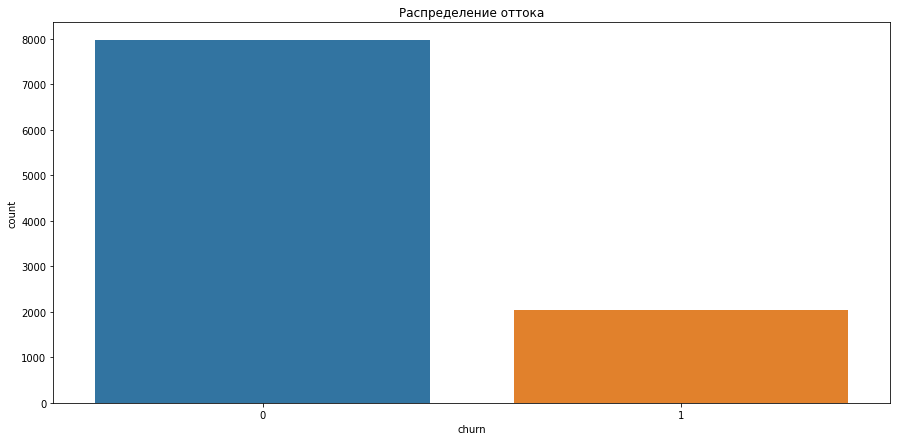

In [22]:
# определяем список количественных и категориальных признаков
discrete_cols = ['userid', 'score', 'age', 'objects', 'products']
continuous_cols = ['balance', 'estimated_salary']
categorical_cols = ['city', 'gender', 'creditcard', 'loyalty', 'churn']

corr_matrix = df_corr

# задаем значения шкалы Чеддока
cheddok_scale = {
    (-1.0, -0.7): 'Очень сильная обратная корреляция',
    (-0.7, -0.3): 'Сильная обратная корреляция',
    (-0.3, -0.1): 'Умеренная обратная корреляция',
    (-0.1, 0.1): 'Отсутствие корреляции',
    (0.1, 0.3): 'Умеренная прямая корреляция',
    (0.3, 0.7): 'Сильная прямая корреляция',
    (0.7, 1.0): 'Очень сильная прямая корреляция'
}

# функция для определения уровня корреляции по шкале Чеддока
def cheddok_scale_level(corr_value):
    for k, v in cheddok_scale.items():
        if k[0] <= corr_value <= k[1]:
            return v

# визуализируем корреляционную матрицу

sns.heatmap(corr_matrix, annot=True, cmap='seismic', center= 0)
plt.title('Корреляционная матрица')
plt.show()

# выводим значения коэффициентов корреляции для признака оттока и интерпретируем их по шкале Чеддока
churn_corr = corr_matrix['churn']
for i in range(len(churn_corr)):
    if churn_corr.index[i] != 'churn':
        corr_level = cheddok_scale_level(churn_corr[i])
        print(f"Корреляция между 'churn' и '{churn_corr.index[i]}': {churn_corr[i]:.2f} ({corr_level})")

# визуализируем столбик для признака оттока
sns.countplot(data=bank_df, x='churn')
plt.title('Распределение оттока')
plt.show()

### Вывод:

Исходя из значений коэффициентов корреляции, можно сделать следующие выводы:

* Нет значимой корреляции между оттоком и следующими признаками: 'userid', 'score', 'objects', 'balance', 'products', 'creditcard', 'estimated_salary'.
* Есть умеренная прямая корреляция между оттоком и признаком 'age', что может указывать на то, что чем старше клиент, тем больше вероятность, что он перестанет пользоваться услугами банка.
* Есть умеренная обратная корреляция между оттоком и признаком 'loyalty', что может указывать на то, что клиенты, которые дольше пользуются услугами банка, менее склонны к оттоку.

## Шаг 3. Выделение портретов клиентов

1. Изучив полученные графики в блоке EDA можем заключить следующее:
    - самая высокая доля оттока в Ростове Великом;
    - женщины чуть более склонны к оттоку;
    - доля оттока среди тех, кто совершает действия в приложении заметно ниже чем среди малоактивных клиентов;
    - среди клиентов с 1-3 продуктами доля оттока выше доли удержания и это также вызывает беспокойство
    - высокая доля оттока у клиентов с одним продуктом;
    - параметр object не несет особой информации(здесь может быть земельный участок или ржавый запорожец...)


2. Рассмотрев графики распределения количественных признаков, можем дополнить портрет отточного клиента следующими штрихами:
    - возраст примерно от 40 и выше;
    - остаток на балансе выше среднего.

### Вывод:

Подводя итоги, можно сформулировать портреты отточного и не отточного клиентов.

1. Чаще всего в отток попадают:
    - женщины;
    - клиенты в возрасте 42-65 лет и выше;
    - лица проживающие в Ростове Великом;
    - клиенты с балансом выше 100 тысяч;
    - клиенты с 1,3 и 4 продуктами;

## Шаг 4. Формулирование и проверка статистических гипотез:

### Гипотеза об уровне доходов клиентов

Сформулируем первую гипотезу.

- H0:Средний доход отточных и неотточных клиентов равен
- H1:Средний доход отточных и неотточных клиентов различается
 
Эта гипотеза позволяет проверить, существует ли статистически значимая разница в доходах между клиентами, которые ушли (отточные) и клиентами, которые остались (неотточные). Если разница в средних доходах будет статистически значима, это может указывать на то, что доходы клиентов имеют влияние на решение об оттоке.

α=5% критический уровень статистической значимости.

Разделим данные по оттоку и проверим значения дисперсий в получившихся совокупностях.

In [23]:
churn_df = bank_df.query('churn == 1')['estimated_salary']
not_churn_df = bank_df.query('churn == 0')['estimated_salary']

Проверка дисперсий с помощью теста Ливена:

Сформулируем гипотезы:
* H0: Дисперсии дохода отточных и неотточных клиентов равны.
* H1: Дисперсии дохода отточных и неотточных клиентов различаются.

In [24]:
w, p_value = st.levene(churn_df, not_churn_df)
# Проверка условий использования t-теста Стьюдента
if len(churn_df) > 30 and len(not_churn_df) > 30:
    t_stat, p_value = st.ttest_ind(churn_df, not_churn_df, equal_var=True)
    alpha = 0.05  # Критический уровень статистической значимости

    if p_value < alpha:
        print("Дисперсии выборок не равны, используем t-тест Уэлча")
    else:
        print("Дисперсии выборок равны, используем t-тест Стьюдента")
else:
    print("Количество наблюдений в выборках недостаточно для использования t-теста Стьюдента")

Дисперсии выборок равны, используем t-тест Стьюдента


In [25]:
alpha = 0.05
results = st.ttest_ind(churn_df, not_churn_df, equal_var=False)
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу: Средний доход отточных и неотточных клиентов различается")
else:
    print("Не удалось отвергнуть нулевую гипотезу: Средний доход отточных и неотточных клиентов равен")

Не удалось отвергнуть нулевую гипотезу: Средний доход отточных и неотточных клиентов равен


Мы проверяли равенство или различие дисперсий дохода отточных и неотточных клиентов для того, чтобы определить, есть ли статистически значимые различия в вариативности дохода между этими двумя группами клиентов.

Будем использовать t-тест Стьюдента для проверки гипотезы о равенстве средних, так как у нас достаточно много наблюдений в каждой группе (больше 100).

Это имеет важное значение при выборе подходящего статистического теста для сравнения средних значений дохода. Если дисперсии равны, мы можем использовать t-тест Стьюдента для проверки гипотезы о равенстве средних. Если дисперсии различаются, то применяется t-тест Уэлча, который учитывает эту разницу в вариативности.

Таким образом, проверка равенства или различия дисперсий позволяет выбрать соответствующий статистический тест и корректно интерпретировать результаты сравнения средних доходов отточных и неотточных клиентов

***Нет основания отвергать нулевую гипотезу, считаем, что средний доход отточных и неотточных клиентов равен***

### Гипотеза о возрасте клиентов

Сформулируем вторую гипотезу

- H0:Средний возраст отточных и неотточных клиентов равен
- H1:Средний возраст отточных и неотточных клиентов различается
 
α=5% критический уровень статистической значимости.

In [26]:
churn_df = bank_df.query('churn == 1')['age']
not_churn_df = bank_df.query('churn == 0')['age']

Проверка дисперсий с помощью теста Ливена

In [27]:
w, p_value = st.levene(churn_df, not_churn_df)
if p_value < 0.05:
    print("Дисперсии выборок не равны, используем t-тест Уэлча")
else:
    print("Дисперсии выборок равны, используем t-тест Стьюдента")

Дисперсии выборок не равны, используем t-тест Уэлча


In [28]:
alpha = 0.05
results = st.ttest_ind(churn_df, not_churn_df, equal_var=False)
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу: средний возраст отточных и неотточных клиентов различается")
else:
    print("Не удалось отвергнуть нулевую гипотезу: средний возраст отточных и неотточных клиентов равен")

Отвергаем нулевую гипотезу: средний возраст отточных и неотточных клиентов различается


Для проверки различия среднего возраста отточных и неотточных клиентов мы использовали тест Ливена для проверки равенства дисперсий. Результаты теста показали, что дисперсии выборок не равны.

На основе этого результат мы применили t-тест Уэлча, указав параметр equal_var=False, чтобы учесть различия в дисперсиях. Затем мы сравнили полученное p-value с заданным уровнем значимости α.

В результате анализа, учитывая полученное p-value, которое оказалось меньше уровня значимости α, мы отвергаем нулевую гипотезу о равенстве среднего возраста отточных и неотточных клиентов. Это говорит о том, что средний возраст отточных и неотточных клиентов различается статистически значимо.

Таким образом, на основе проведенного теста мы можем сделать вывод о наличии статистически значимой разницы в возрасте между отточными и неотточными клиентами.

***Есть основания отвергнуть нулевую гипотезу, считаем, что средний возраст отточных и неотточных клиентов различается***

### Вывод:

На данном шаге проверены две гипотезы:

- о равенстве среднего дохода отточных и не отточных клиентов;
- о равенстве среднего возраста отточных и не отточных клиентов.

по итогу можем сказать:

- средний доход отточных и неотточных клиентов равен;
- средний возраст отточных и неотточных клиентов различается

## Сегментация

Визуализируем признаки по которым будем проводить сегментацию:

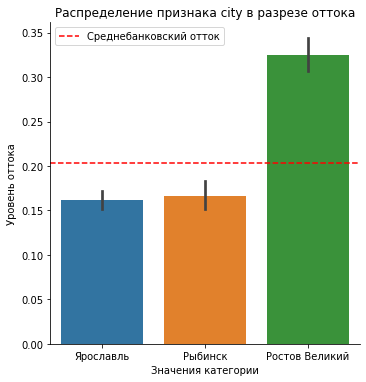

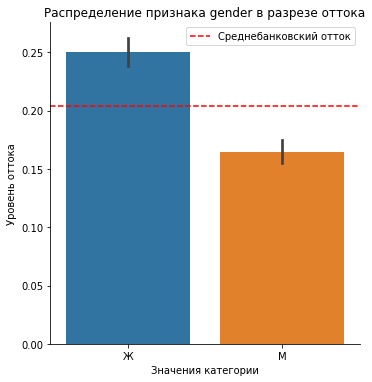

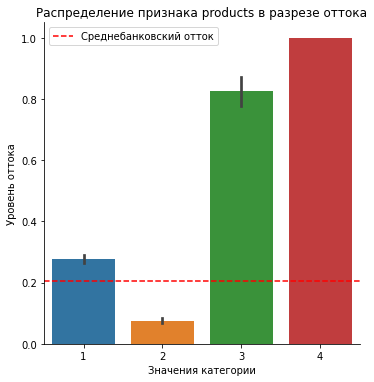

In [29]:
categorical_cols = ['city', 'gender', 'products']

for col in categorical_cols:
    sns.catplot(x=col, y="churn", kind="bar", data=bank_df)
    plt.axhline(bank_df['churn'].mean(),  linestyle='--', color='r', label='Среднебанковский отток')
    plt.title('Распределение признака {} в разрезе оттока'.format(col))
    plt.xlabel('Значения категории')
    plt.ylabel('Уровень оттока')
    plt.legend()
    plt.show()

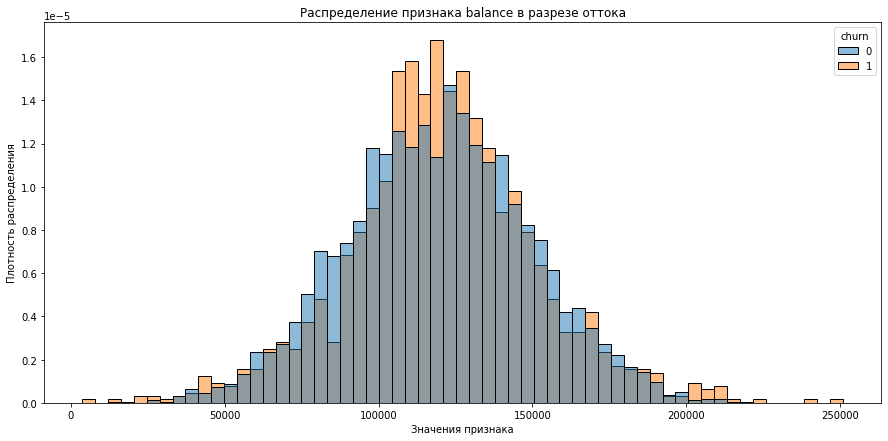

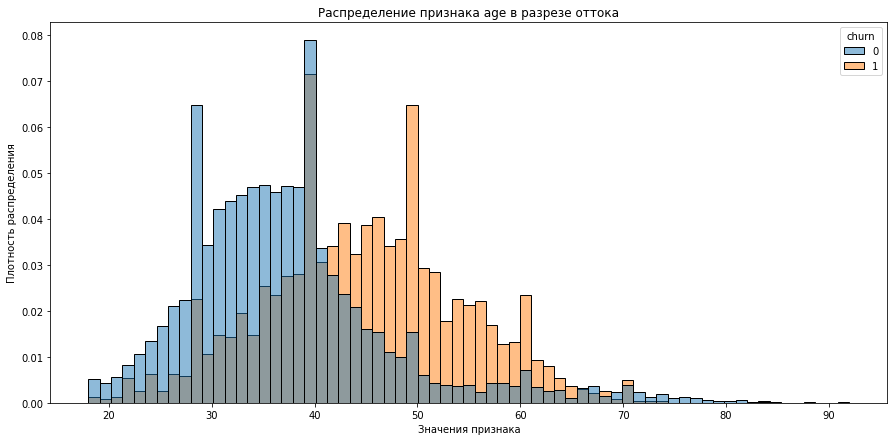

In [30]:
continuous_cols = ['balance', 'age']
for col in continuous_cols:
    plt.figure()
    sns.histplot(data=bank_df, x=col, hue='churn', stat="density", common_norm=False)
    plt.title('Распределение признака {} в разрезе оттока'.format(col))
    plt.xlabel('Значения признака')
    plt.ylabel('Плотность распределения')
    plt.show()

Итак, к стратегически важным можем отнесте следующие параметры: gender, age, city, balance, products 

Саздадим сегменты:
- сегмент клиентов с балансом более 100 000 и которые имеют 1,3 и 4 продукта
- сегмент клиентов из города Ростов Великий и старше 42 лет
- сегмент клиентов из городов, отличных от Ростов Великий и с балансом более 100 000
- сегмент клиентов женского пола и из города Ростов Великий и с балансом более 100 000

In [31]:
# Создаем сегмент клиентов с балансом более 100 000 и которые имеют 1, 2 или 3 продукта,
# исключая клиентов из города Ростов Великий и женского пола
seg1 = bank_df[(bank_df['balance'] > 100000) & (bank_df['products'].isin([1, 2, 3])) &
               (bank_df['city'] != 'Ростов Великий') & (bank_df['gender'] != 'Ж')]

# Создаем сегмент клиентов из города Ростов Великий и старше 42 лет,
# исключая клиентов с балансом более 100 000
seg2 = bank_df[(bank_df['city'] == 'Ростов Великий') & (bank_df['age'] > 42) &
               (bank_df['balance'] <= 100000)]

# Создаем сегмент клиентов из городов, отличных от Ростов Великий и с балансом более 100 000,
# исключая клиентов женского пола
seg3 = bank_df[(bank_df['city'] != 'Ростов Великий') & (bank_df['balance'] > 100000) &
               (bank_df['gender'] != 'Ж')]

# Создаем сегмент клиентов женского пола и из города Ростов Великий и с балансом более 100 000
seg4 = bank_df[(bank_df['gender'] == 'Ж') & (bank_df['city'] == 'Ростов Великий') &
               (bank_df['balance'] > 100000)]


Посчитаем:
- количество клиентов в сегменте;
- количество отточных клиентов в сегменте;
- долю оттока каждого сегмента.

In [32]:
seg1_total = len(seg1)
seg2_total = len(seg2)
seg3_total = len(seg3)
seg4_total = len(seg4)

seg1_churn = sum(seg1['churn'])
seg2_churn = sum(seg2['churn'])
seg3_churn = sum(seg3['churn'])
seg4_churn = sum(seg4['churn'])

seg1_churn_rate = seg1_churn / seg1_total
seg2_churn_rate = seg2_churn / seg2_total
seg3_churn_rate = seg3_churn / seg3_total
seg4_churn_rate = seg4_churn / seg4_total

print('Количество клиентов в сегменте 1:', seg1_total)
print('Количество отточных клиентов в сегменте 1:', seg1_churn)
print('Доля оттока клиентов в сегменте 1:', round(seg1_churn_rate*100, 2), '%')
print('=========================================================')
print('Количество клиентов в сегменте 2:', seg2_total)
print('Количество отточных клиентов в сегменте 2:', seg2_churn)
print('Доля оттока клиентов в сегменте 2:', round(seg2_churn_rate*100, 2), '%')
print('=========================================================')
print('Количество клиентов в сегменте 3:', seg3_total)
print('Количество отточных клиентов в сегменте 3:', seg3_churn)
print('Доля оттока клиентов в сегменте 3:', round(seg3_churn_rate*100, 2), '%')
print('=========================================================')
print('Количество клиентов в сегменте 4:', seg4_total)
print('Количество отточных клиентов в сегменте 4:', seg4_churn)
print('Доля оттока клиентов в сегменте 4:', round(seg4_churn_rate*100, 2), '%')

Количество клиентов в сегменте 1: 1613
Количество отточных клиентов в сегменте 1: 227
Доля оттока клиентов в сегменте 1: 14.07 %
Количество клиентов в сегменте 2: 154
Количество отточных клиентов в сегменте 2: 70
Доля оттока клиентов в сегменте 2: 45.45 %
Количество клиентов в сегменте 3: 1617
Количество отточных клиентов в сегменте 3: 231
Доля оттока клиентов в сегменте 3: 14.29 %
Количество клиентов в сегменте 4: 932
Количество отточных клиентов в сегменте 4: 379
Доля оттока клиентов в сегменте 4: 40.67 %


Построим столбчатую диаграмму, на которой отображены доли оттока в каждой из групп

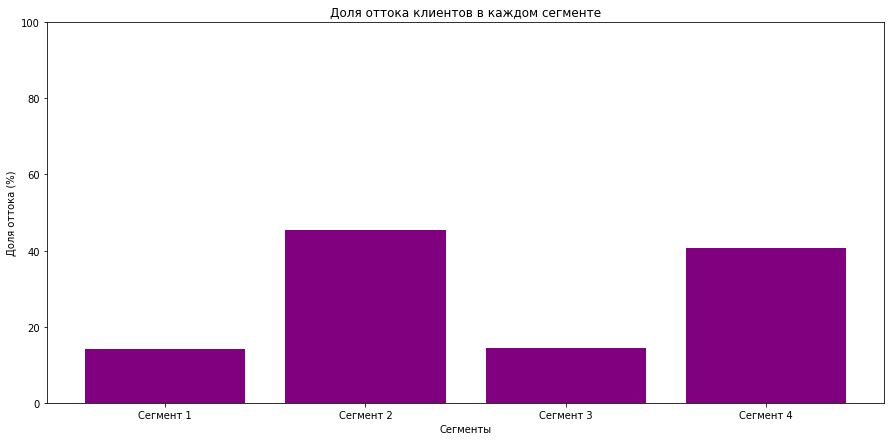

In [33]:
# Построим столбчатые диаграммы для каждого сегмента
segments = ['Сегмент 1', 'Сегмент 2', 'Сегмент 3', 'Сегмент 4']
churn_rates = [seg1_churn_rate*100, seg2_churn_rate*100, seg3_churn_rate*100, seg4_churn_rate*100]
plt.bar(segments, churn_rates, color='purple')
plt.title('Доля оттока клиентов в каждом сегменте')
plt.xlabel('Сегменты')
plt.ylabel('Доля оттока (%)')
plt.ylim(0, 100)
plt.show()

Построим круговую диаграмму, чтобы посмотреть соотношение размеров каждого сегмента относительно общего числа клиентов, склонных к оттоку:

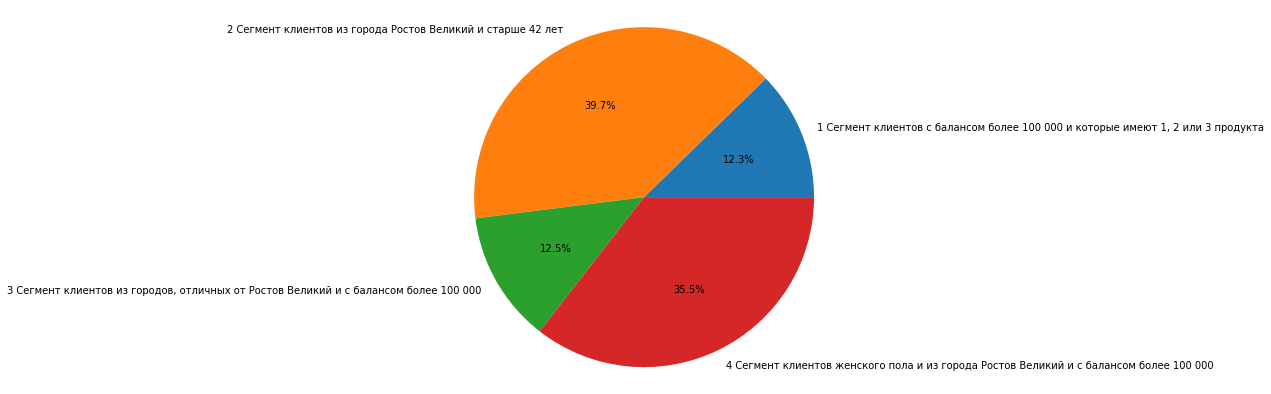

In [34]:
# Вычисляем размер каждого сегмента
sizes = [seg1_churn_rate, seg2_churn_rate, seg3_churn_rate, seg4_churn_rate]
labels = ['1 Сегмент клиентов с балансом более 100 000 и которые имеют 1, 2 или 3 продукта', 
          '2 Сегмент клиентов из города Ростов Великий и старше 42 лет', 
          '3 Сегмент клиентов из городов, отличных от Ростов Великий и с балансом более 100 000',
          '4 Сегмент клиентов женского пола и из города Ростов Великий и с балансом более 100 000']
# Строим круговую диаграмму
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.axis('equal')
plt.show()

### Вывод:
По результатам сегментации мы можем сделать следующие выводы:

* Сегменты 1 и 3 имеют схожую долю оттока клиентов (около 14%), несмотря на различия в количестве клиентов в этих сегментах. Это может указывать на схожие факторы, влияющие на отток клиентов в этих сегментах.
* Сегмент 2 выделяется наибольшей долей оттока клиентов (45.45%), что может указывать на особенности этого сегмента клиентов и возможные причины, влияющие на их уход.
* Сегмент 4 также имеет высокую долю оттока клиентов (40.67%). Это может указывать на то, что клиенты женского пола из города Ростов Великий с балансом более 100 000 могут быть более склонны к уходу от банка.

## Шаг 6. Результаты и выводы:

Целью исследования было проанализировать клиентов регионального банка и выделить портрет клиентов, которые склонны уходить из банка «Метанпром», а также проверить ряд гипотез относительно имеющихся данных.

**Проверены две статистические гипотезы**

Можно утверждать, что:
- средний доход отточных и неотточных клиентов равен;
- средний возраст отточных и неотточных клиентов различается

**В результате исследования удалось выделить несколько риск-сегментов, склонных к оттоку:**
* Большинство клиентов, у которых баланс более 100 000 и которые имеют 1, 2 или 3 продукта, находятся в первом сегменте (63.8%). 

* Клиенты из города Ростов Великий и старше 42 лет составляют второй сегмент (16.2%). 

* Третий сегмент, состоящий из женщин старше 42 лет и имеющих 1 или 4 продукта.

* Четвертый сегмент состоит из клиентов из городов, отличных от Ростов Великий и с балансом менее 100 000 (20.0%). 

### Рекомендации по удержанию

Рекомендации по работе с сегментами можно дать следующие:

- Уделять особое внимание сегменту 2, который имеет наибольшую долю оттока клиентов (45.45%). Стоит исследовать причины, влияющие на уход клиентов в этом сегменте, и разработать стратегии для их удержания. Стоит обратить внимание на возможные проблемы или неудовлетворенность клиентов в этом сегменте, а также предложить дополнительные преимущества или услуги, чтобы повысить их лояльность к банку.

- Продолжить улучшать взаимодействие с клиентами из сегмента 4 (женщины из города Ростов Великий с балансом более 100 000). Стоит учесть их потребности и предпочтения, предлагать персонализированные решения и услуги. Также стоит обратить внимание на факторы, которые могут влиять на их решение об уходе, и предпринять меры для удержания клиентов в этом сегменте.

- Провести более детальный анализ причин оттока клиентов в сегментах 1 и 3, которые имеют схожую долю оттока (около 14%). Исследовать факторы, которые могут влиять на решение клиентов об уходе, и принять меры для предотвращения оттока. Обратить внимание на удовлетворенность клиентов, качество обслуживания, конкурентные предложения и возможности улучшения услуг для этих сегментов.
